# KMeans clusturing

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:
df=pd.read_csv("live.csv")

In [19]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [21]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [22]:
print(df.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [ ]:
dup=df[df.duplicated()]
dup

In [24]:
df = df.drop(columns=["Column1","Column2","Column3","Column4"])

In [25]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [26]:
u=df['status_published'].unique()
u

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      shape=(6913,), dtype=object)

In [27]:
df = df.drop(columns=["status_id","status_published"])

In [28]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [30]:

x=df
y=df['status_type']

In [31]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
x['status_type'] = le.fit_transform(x['status_type'])
y=le.transform(y)

In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [34]:
cols=x.columns

In [35]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()

x=ms.fit_transform(x)

# 2 cluster

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [38]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

In [39]:
kmeans.inertia_

237.75726404419547

In [41]:
label=kmeans.labels_
correct_label = sum(y==label)
print("Result: %d out of %d sample are correctly labeled."%(correct_label,y.size))
print((correct_label/y.size)*100)

Result: 4288 out of 7050 sample are correctly labeled.
60.822695035460995


## elbow method

Text(0, 0.5, 'Inertia')

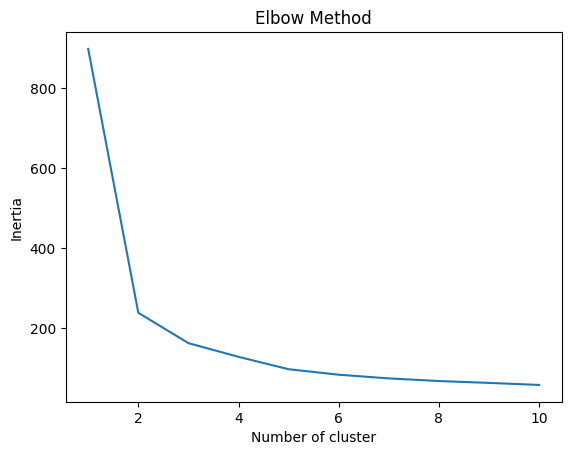

In [43]:
from sklearn.cluster import KMeans

cs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')

## for nnumber of cluster 3

In [46]:
kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(x)
kmeans.cluster_centers_
print(kmeans.inertia_)

label=kmeans.labels_
correct_label = sum(y==label)
print("Result: %d out of %d sample are correctly labeled."%(correct_label,y.size))
print((correct_label/y.size)*100)

178.66340039279422
Result: 4066 out of 7050 sample are correctly labeled.
57.673758865248224


## for number of cluster 4

In [47]:
kmeans = KMeans(n_clusters=4,random_state=0)

kmeans.fit(x)
kmeans.cluster_centers_
print(kmeans.inertia_)

label=kmeans.labels_
correct_label = sum(y==label)
print("Result: %d out of %d sample are correctly labeled."%(correct_label,y.size))
print((correct_label/y.size)*100)

130.3338099042728
Result: 4112 out of 7050 sample are correctly labeled.
58.326241134751776
